# **Initialization**

## **Packages**

In [3]:
!pip install astroquery
!pip install voila
!jupyter serverextension enable voila --sys-prefix
!pip install matplotlib

Enabling: voila
- Writing config: /srv/conda/envs/notebook/etc/jupyter
    - Validating...
      voila 0.2.6 OK
     |████████████████████████████████| 11.6 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 46.9 MB/s eta 0:00:01


## **Imports**

In [4]:
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
import matplotlib

matplotlib.rcParams['font.size']=15

# **Data acquisition and processing**

In [5]:
surveys={
    'Optical':['DSS2 IR', 'DSS2 Red','DSS2 Blue'],
    'IOU' :  ['WISE 22','DSS2 Red','GALEX Near UV'],
    'ROR' : ['TGSS ADR1', 'DSS2 Red','NVSS']
}

In [6]:
def make_RGB(position,radius=1,survey='Optical'):
  try:
    if survey=='ROR':
      paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=surveys[survey])
    else:
      paths = SkyView.get_images(position=position,pixels=600,scaling="Log",radius=radius*u.degree,survey=surveys[survey])
    RGB=[]
    for i,path in enumerate(paths):
      img=path[0].data.copy()

      min=img.min()
      img=img-min
      
      max=img.max()
      RGB.append(img/max)
    RGB=np.array(RGB)
    RGB=np.stack((RGB[0],RGB[1],RGB[2]),axis=2)

    wcs = WCS(paths[0][0].header)
  except :
    print(f"{survey} image not found in Server for {position} ")
    RGB=wcs=None
  return RGB,wcs

In [7]:
def init_contour(position,survey,radius=1):
  try:
    if survey=='TGSS':
      paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=['TGSS ADR1'])
      img=paths[0][0].data.copy()
    elif survey=='NVSS':
      paths = SkyView.get_images(position=position,pixels=600,scaling="Sqrt",sampler='Lanczos3',radius=radius*u.degree,survey=['NVSS'])
      img=paths[0][0].data.copy()

    wcs = WCS(paths[0][0].header)
  except:
    print(f"{survey} image not found for {position}")
    img=wcs=None
  return img,wcs

In [14]:
def RAD_RGB(position,radius,name,levels=4):
  i=1
  # RGB-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='Optical')
  if wcs!=None:
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(projection=wcs)
    ax.imshow(RGB)
    ax.set_autoscale_on(False)

    img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
    levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
    ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)

    ax.set_title(f'Optical RGB with TGSS contours of {position}')
    ax.annotate("#RGBviaNASAnRADatHomeIndia",(10,10),color='red')
    ax.annotate(f"By {name}",(450,10),color='red')
    plt.savefig(f'{position}{i}',bbox_inches = 'tight')
    i+=1
    wcs=None

  # IOU-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='IOU')
  if wcs!=None:
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(projection=wcs)
    ax.imshow(RGB)

    ax.set_title(f'IOU with TGSS Contours of {position}')
    ax.annotate("#RGBviaNASAnRADatHomeIndia",(10,10),color='red')
    ax.annotate(f"By {name}",(450,10),color='red')
    ax.set_autoscale_on(False)

    img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
    levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
    ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
    plt.savefig(f'{position}{i}',bbox_inches = 'tight')
    i+=1
    wcs=None

  # ROR-TGSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='ROR')
  if wcs!=None:
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(projection=wcs)
    ax.imshow(RGB)

    ax.set_title(f'ROR with TGSS contours of {position}')
    ax.annotate("#RGBviaNASAnRADatHomeIndia",(10,10),color='red')
    ax.annotate(f"By {name}",(450,10),color='red')
    ax.set_autoscale_on(False)

    img,wcs_c= init_contour(position=position, survey='TGSS',radius=radius)
    levels_c=np.arange(0.015,img.max(),(img.max()-0.015)/levels)
    ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
    plt.savefig(f'{position}{i}',bbox_inches = 'tight')
    i+=1
    wcs=None

  # ROR-NVSS
  RGB,wcs=make_RGB(position=position,radius=radius,survey='ROR')
  if wcs!=None:
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(projection=wcs)
    ax.imshow(RGB)

    ax.set_title(f'ROR with NVSS Contours of {position}')
    ax.annotate("#RGBviaNASAnRADatHomeIndia",(10,10),color='red')
    ax.annotate(f"By {name}",(450,10),color='red')
    ax.set_autoscale_on(False)

    img,wcs_c= init_contour(position=position, survey='NVSS',radius=radius)
    levels_c=np.arange(0.0015,img.max(),(img.max()-0.0015)/levels)
    ax.contour(img, transform=ax.get_transform(wcs), colors='white',levels=levels_c)
    plt.savefig(f'{position}{i}',bbox_inches = 'tight')

# **User Panel**

Enter your name : 
Enter source coordinate or name : 
Enter radius of source(Degrees) : 


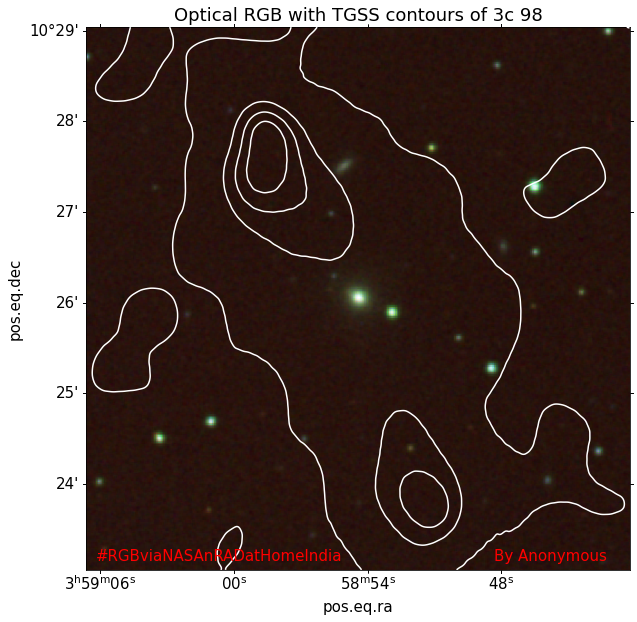

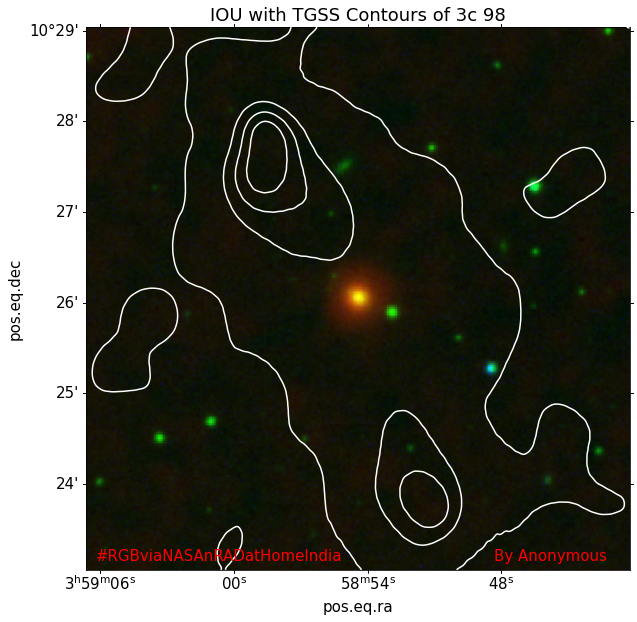

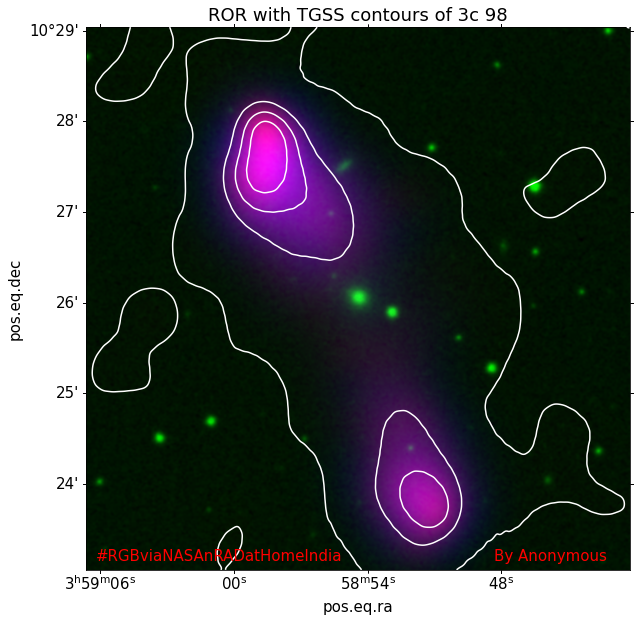

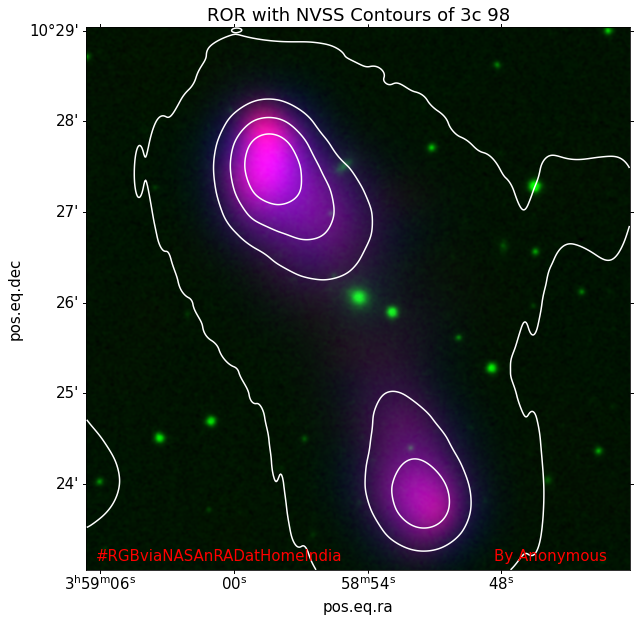

In [15]:
name = input("Enter your name : ") or "Anonymous"
pos  = input("Enter source coordinate or name : ") or "3c 98"
r    = float(input("Enter radius of source(Degrees) : ") or "0.1")
RAD_RGB(position= pos,name=name,radius=r)